### Pre-calc the intersections

In [9]:
from tqdm import tqdm_notebook
import pickle
from neurolang.frontend.neurosynth_utils import NeuroSynthHandler

q = 0.00000001
nshandler = NeuroSynthHandler()
neurosynth_data = nshandler.ns_region_set_from_term(
    'auditory',
    q=q
)

file = open("xyz_from_neurosynth.pkl",'rb')
ret = pickle.load(file)
file.close()

from neurolang.regions import Region, ExplicitVBR
from neurolang.regions import region_intersection as region_intersection_

def region_intersec(
    region_left: Region, region_right: Region
) -> Region:
    
    r_ijk = region_right.to_ijk(region_left.affine)
    region_right = ExplicitVBR(r_ijk, region_left.affine, image_dim=region_left.image_dim)
    temp = region_intersection_((region_left, region_right))
    return temp

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:435: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/frontend/neurosynth_data/dataset.pkl'>
  dataset = pickle.load(open(filename, 'rb'))
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:771: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  columns=self.data['columns']).to_sparse()
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:716: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  feature_weights = self.data.ix[:, features]
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/pandas/core/indexing

In [10]:
result = []
from neurolang.regions import EmptyRegion

for index, region_ns in tqdm_notebook(ret.items()):
    for region_auditory in neurosynth_data:
        res = region_intersec(region_ns, region_auditory)
        if not isinstance(res, EmptyRegion):
            result.append((index, res))

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [11]:
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

destrieux = []
for label_number, name in destrieux_dataset['labels']:
    if label_number == 0:
        continue
    name = name.decode()
    region = RegionMixin.create_region(
        destrieux_map, label=label_number
    )
    if region is None:
        continue
    name = name.replace('-', '_').replace(' ', '_').lower()
    destrieux.append((name, region))
    
inter_regions = []
for ns_index, ns_region in tqdm_notebook(result):
    for dt_name, dt_region in destrieux:
        res = region_intersec(ns_region, dt_region)
        if not isinstance(res, EmptyRegion):
            inter_regions.append((ns_index, dt_name, res))
            
import pickle
with open('regiones', 'wb') as fp:
    pickle.dump(inter_regions, fp)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


### Querys

In [1]:
def get_destrieux_relations():
    return [
        ('l_g_and_s_frontomargin', 'Left frontomarginal gyrus'),
        ('l_g_and_s_occipital_inf', 'Left inferior occipital gyrus'),
        ('l_g_and_s_paracentral', 'Left paracentral lobule'),
        ('l_g_and_s_subcentral', 'Left subcentral gyrus'),
        (
            'l_g_and_s_transv_frontopol',
            'Left superior transverse frontopolar gyrus'
        ),
        ('l_g_and_s_cingul_ant', 'Left anterior cingulate gyrus'),
        (
            'l_g_and_s_cingul_mid_ant',
            'Left anterior middle cingulate gyrus'
        ),
        (
            'l_g_and_s_cingul_mid_post',
            'Left posterior middle cingulate gyrus'
        ),
        (
            'l_g_cingul_post_dorsal',
            'Dorsal segment of left posterior middle cingulate gyrus'
        ),
        (
            'l_g_cingul_post_ventral',
            'Ventral segment of left posterior middle cingulate gyrus'
        ),
        ('l_g_cuneus', 'Left cuneus'),
        (
            'l_g_front_inf_opercular',
            'Opercular part of left inferior frontal gyrus'
        ),
        (
            'l_g_front_inf_orbital',
            'Orbital part of left inferior frontal gyrus'
        ),
        (
            'l_g_front_inf_triangul',
            'Triangular part of left inferior frontal gyrus'
        ),
        ('l_g_front_middle', 'Left middle frontal gyrus'),
        ('l_g_front_sup', 'Left superior frontal gyrus'),
        ('l_g_ins_lg_and_s_cent_ins', 'Left central insular sulcus'),
        ('l_g_ins_lg_and_s_cent_ins', 'Left long insular gyrus'),
        ('l_g_insular_short', 'Short insular gyrus'),
        ('l_g_occipital_middleLeft', ' 	Left lateral occipital gyrus'),
        ('l_g_occipital_sup', 'Left superior occipital gyrus'),
        ('l_g_oc_temp_lat_fusifor', 'Left fusiform gyrus'),
        ('l_g_oc_temp_med_lingual', 'Left lingual gyrus'),
        ('l_g_oc_temp_med_parahip', 'Left parahippocampal gyrus'),
        ('l_g_orbital', 'Left orbital gyrus'),
        ('l_g_pariet_inf_angular', 'Left angular gyrus'),
        ('l_g_pariet_inf_supramar', 'Left supramarginal gyrus'),
        ('l_g_parietal_sup', 'Left superior parietal lobule'),
        ('l_g_postcentral', 'Left postcentral gyrus'),
        ('l_g_precentral', 'Left precentral gyrus'),
        ('l_g_precuneus', 'Left precuneus'),
        ('l_g_rectus', 'Left straight gyrus'),
        ('l_g_subcallosal', 'Left paraterminal gyrus'),
        ('l_g_temp_sup_g_t_transv', 'Left transverse temporal gyrus'),
        ('l_g_temp_sup_lateral', 'Left superior temporal gyrus'),
        ('l_g_temp_sup_plan_polar', 'Left superior temporal gyrus'),
        ('l_g_temp_sup_plan_tempo', 'Left superior temporal gyrus'),
        ('l_g_temporal_inf', 'Left inferior temporal gyrus'),
        ('l_g_temporal_middle', 'Left middle temporal gyrus'),
        (
            'l_lat_fis_ant_horizont',
            'Anterior horizontal limb of left lateral sulcus'
        ),
        (
            'l_lat_fis_ant_vertical',
            'Anterior ascending limb of left lateral sulcus'
        ),
        (
            'l_lat_fis_post',
            'Posterior ascending limb of left lateral sulcus'
        ),
        ('l_lat_fis_post', 'Left lateral sulcus'),
        ('l_pole_occipital', 'Left occipital pole'),
        ('l_pole_temporal', 'Left temporal pole'),
        ('l_s_calcarine', 'Left Calcarine sulcus'),
        ('l_s_central', 'Left central sulcus'),
        ('l_s_cingul_marginalis', 'Left marginal sulcus'),
        ('l_s_circular_insula_ant', 'Circular sulcus of left insula'),
        ('l_s_circular_insula_inf', 'Circular sulcus of left insula'),
        ('l_s_circular_insula_sup', 'Circular sulcus of left insula'),
        ('l_s_collat_transv_ant', 'Left collateral sulcus'),
        ('l_s_collat_transv_post', 'Left collateral sulcus'),
        ('l_s_front_inf', 'Left inferior frontal sulcus'),
        ('l_s_front_sup', 'Left superior frontal sulcus'),
        ('l_s_intrapariet_and_p_trans', 'Left intraparietal sulcus'),
        ('l_s_oc_middle_and_lunatus', 'Left lunate sulcus'),
        ('l_s_oc_sup_and_transversal', 'Left transverse occipital sulcus'),
        ('l_s_occipital_ant', 'Left anterior occipital sulcus'),
        ('l_s_oc_temp_lat', 'Left occipitotemporal sulcus'),
        ('l_s_oc_temp_med_and_lingual', 'Left intralingual sulcus'),
        ('l_s_orbital_lateral', 'Left orbital sulcus'),
        ('l_s_orbital_med_olfact', 'Left olfactory sulcus'),
        ('l_s_orbital_h_shaped', 'Left transverse orbital sulcus'),
        ('l_s_orbital_h_shaped', 'Left orbital sulcus'),
        ('l_s_parieto_occipital', 'Left parieto-occipital sulcus'),
        ('l_s_pericallosal', 'Left callosal sulcus'),
        ('l_s_postcentral', 'Left postcentral sulcus'),
        ('l_s_precentral_inf_part', 'Left precentral sulcus'),
        ('l_s_precentral_sup_part', 'Left precentral sulcus'),
        ('l_s_suborbital', 'Left fronto-orbital sulcus'),
        ('l_s_subparietal', 'Left subparietal sulcus'),
        ('l_s_temporal_inf', 'Left inferior temporal sulcus'),
        ('l_s_temporal_sup', 'Left superior temporal sulcus'),
        ('l_s_temporal_transverse', 'Left transverse temporal sulcus'),
        ('r_g_and_s_frontomargin', 'Right frontomarginal gyrus'),
        ('r_g_and_s_occipital_inf', 'Right inferior occipital gyrus'),
        ('r_g_and_s_paracentral', 'Right paracentral lobule'),
        ('r_g_and_s_subcentral', 'Right subcentral gyrus'),
        (
            'r_g_and_s_transv_frontopol',
            'Right superior transverse frontopolar gyrus'
        ),
        ('r_g_and_s_cingul_ant', 'Right anterior cingulate gyrus'),
        (
            'r_g_and_s_cingul_mid_ant',
            'Right anterior middle cingulate gyrus'
        ),
        (
            'r_g_and_s_cingul_mid_post',
            'Right posterior middle cingulate gyrus'
        ),
        (
            'r_g_cingul_post_dorsal',
            'Dorsal segment of right posterior middle cingulate gyrus'
        ),
        (
            'r_g_cingul_post_ventral',
            'Ventral segment of right posterior middle cingulate gyrus'
        ),
        ('r_g_cuneus', 'Right cuneus'),
        (
            'r_g_front_inf_opercular',
            'Opercular part of right inferior frontal gyrus'
        ),
        (
            'r_g_front_inf_orbital',
            'Orbital part of right inferior frontal gyrus'
        ),
        (
            'r_g_front_inf_triangul',
            'Triangular part of right inferior frontal gyrus'
        ),
        ('r_g_front_middle', 'Right middle frontal gyrus'),
        ('r_g_front_sup', 'Right superior frontal gyrus'),
        ('r_g_ins_lg_and_s_cent_ins', 'Right central insular sulcus'),
        ('r_g_ins_lg_and_s_cent_ins', 'Right long insular gyrus'),
        ('r_g_insular_short', 'Right short insular gyrus'),
        ('r_g_occipital_middle', 'Right lateral occipital gyrus'),
        ('r_g_occipital_sup', 'Right superior occipital gyrus'),
        ('r_g_oc_temp_lat_fusifor', 'Right fusiform gyrus'),
        ('r_g_oc_temp_med_lingual', 'Right lingual gyrus'),
        ('r_g_oc_temp_med_parahip', 'Right parahippocampal gyrus'),
        ('r_g_orbital', 'Right orbital gyrus'),
        ('r_g_pariet_inf_angular', 'Right angular gyrus'),
        ('r_g_pariet_inf_supramar', 'Right supramarginal gyrus'),
        ('r_g_parietal_sup', 'Right superior parietal lobule'),
        ('r_g_postcentral', 'Right postcentral gyrus'),
        ('r_g_precentral', 'Right precentral gyrus'),
        ('r_g_precuneus', 'Right precuneus'),
        ('r_g_rectus', 'Right straight gyrus'),
        ('r_g_subcallosal', 'Right paraterminal gyrus'),
        ('r_g_temp_sup_g_t_transv', 'Right transverse temporal gyrus'),
        ('r_g_temp_sup_lateral', 'Right superior temporal gyrus'),
        ('r_g_temp_sup_plan_polar', 'Right superior temporal gyrus'),
        ('r_g_temp_sup_plan_tempo', 'Right superior temporal gyrus'),
        ('r_g_temporal_inf', 'Right inferior temporal gyrus'),
        ('r_g_temporal_middle', 'Right middle temporal gyrus'),
        (
            'r_lat_fis_ant_horizont',
            'Anterior horizontal limb of right lateral sulcus'
        ),
        (
            'r_lat_fis_ant_vertical',
            'Anterior ascending limb of right lateral sulcus'
        ),
        ('r_lat_fis_post', 'Right lateral sulcus'),
        (
            'r_lat_fis_post',
            'Posterior ascending limb of right lateral sulcus'
        ),
        ('r_pole_occipital', 'Right occipital pole'),
        ('r_pole_temporal', 'Right temporal pole'),
        ('r_s_calcarine', 'Right Calcarine sulcus'),
        ('r_s_central', 'Right central sulcus'),
        ('r_s_cingul_marginalis', 'Right marginal sulcus'),
        ('r_s_circular_insula_ant', 'Circular sulcus of Right insula'),
        ('r_s_circular_insula_inf', 'Circular sulcus of Right insula'),
        ('r_s_circular_insula_sup', 'Circular sulcus of Right insula'),
        ('r_s_collat_transv_ant', 'Right collateral sulcus'),
        ('r_s_collat_transv_post', 'Right collateral sulcus'),
        ('r_s_front_inf', 'Right inferior frontal sulcus'),
        ('r_s_front_sup', 'Right superior frontal sulcus'),
        ('r_s_intrapariet_and_p_trans', 'Right intraparietal sulcus'),
        ('r_s_oc_middle_and_lunatus', 'Right lunate sulcus'),
        (
            'r_s_oc_sup_and_transversal',
            'Right transverse occipital sulcus'
        ),
        ('r_s_occipital_ant', 'Right anterior occipital sulcus'),
        ('r_s_oc_temp_lat', 'Right occipitotemporal sulcus'),
        ('r_s_oc_temp_med_and_lingual', 'Right intralingual sulcus'),
        ('r_s_orbital_lateral', 'Right orbital sulcus'),
        ('r_s_orbital_med_olfact', 'Right olfactory sulcus'),
        ('r_s_orbital_h_shaped', 'Right orbital sulcus'),
        ('r_s_orbital_h_shaped', 'Right transverse orbital sulcus'),
        ('r_s_parieto_occipital', 'Right parieto-occipital sulcus'),
        ('r_s_pericallosal', 'Right callosal sulcus'),
        ('r_s_postcentral', 'Right postcentral sulcus'),
        ('r_s_precentral_inf_part', 'Right precentral sulcus'),
        ('r_s_precentral_sup_part', 'Right precentral sulcus'),
        ('r_s_suborbital', 'Right fronto-orbital sulcus'),
        ('r_s_subparietal', 'Right subparietal sulcus'),
        ('r_s_temporal_inf', 'Right inferior temporal sulcus'),
        ('r_s_temporal_sup', 'Right superior temporal sulcus'),
        ('r_s_temporal_transverse', 'Right transverse temporal sulcus'),
    ]

In [2]:
from neurolang.datalog.ontologies_parser import OntologiesParser
from neurolang.datalog.ontologies_rewriter import OntologyRewriter

from neurolang.datalog.constraints_representation import DatalogConstraintsProgram
from neurolang.expression_walker import ExpressionBasicEvaluator

from neurolang import frontend as fe

class Datalog(DatalogConstraintsProgram, ExpressionBasicEvaluator):
    pass

paths = ['./neurofma_fma3.0.owl']
namespaces = ['http://sig.biostr.washington.edu/fma3.0']
onto = OntologiesParser(paths, namespaces)
nl = fe.NeurolangDL()
datalog_program = onto.parse_ontology(nl.solver)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/utils/data_manipulation.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gzanit

In [3]:
import pandas as pd

prob_terms = pd.read_hdf('neurosynth_prob.h5', key='terms')
prob_voxels = pd.read_hdf('neurosynth_prob.h5', key='voxels')
prob_terms_voxels = pd.read_hdf('neurosynth_prob.h5', key='terms_voxels')

prob_terms_voxels = prob_terms_voxels[prob_terms_voxels.index.get_level_values('term') == 'auditory']
prob_terms = prob_terms[prob_terms['index'] == 'auditory']

prob_terms = prob_terms[['proba', 'index']]

prob_voxels.reset_index(inplace=True)
prob_voxels.rename(columns={0: 'prob'}, inplace=True)
prob_voxels = prob_voxels[['prob', 'index']]

prob_terms_voxels.reset_index(inplace=True)
prob_terms_voxels = prob_terms_voxels[['prob', 'term', 'variable']]

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from neurolang.logic import Implication
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin
from neurolang.expressions import ExpressionBlock, Symbol, Constant
from neurolang.logic import Implication
from neurolang.regions import Region, region_union as region_union_
import typing 

S_ = Symbol
C_ = Constant

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

relation_region = S_('relation_region')
relation_name = S_('relation_name')
neurosynth = Symbol('neurosynth')

destrieux = []
for label_number, name in destrieux_dataset['labels']:
    if label_number == 0:
        continue
    name = name.decode()
    region = RegionMixin.create_region(
        destrieux_map, label=label_number
    )
    if region is None:
        continue
    name = name.replace('-', '_').replace(' ', '_').lower()
    destrieux.append((name, region))
    
r_region = tuple([relation_region(C_(region), C_(name)) for name, region in destrieux])

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [5]:
from operator import eq
from neurolang.logic import Implication
from nilearn import datasets
import nibabel as nib
from neurolang.frontend.query_resolution import RegionMixin
from neurolang.expressions import ExpressionBlock, Symbol, Constant
from neurolang.logic import Implication
from neurolang.datalog.aggregation import AggregationApplication

inter_reg = Symbol('inter_reg')
active_region = Symbol('active_region')

w = Symbol('w')
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
eq_ = Constant(eq)
id_ = Symbol('id_')
reg = Symbol('reg')
sub = Symbol('sub')

neurosynth_region = Symbol('neurosynth_region')
neurosynth_rv = Symbol('neurosynth_rv')
region2voxel = Symbol('region2voxel')

label = Symbol('http://www.w3.org/2000/01/rdf-schema#label')
subClassOf = Symbol('http://www.w3.org/2000/01/rdf-schema#subClassOf')
region = Symbol('region')
regional_part = Symbol('http://sig.biostr.washington.edu/fma3.0#regional_part_of')

relations_list = get_destrieux_relations()
r_name = tuple([relation_name(C_(destrieux), C_(fma)) for destrieux, fma in relations_list])

#Auditory
imps = tuple()
imps += (Implication(id_(y), label(y, C_('Temporal lobe'))),)
imps += (Implication(reg(x), regional_part(x, y) & id_(y)),)
imps += (Implication(sub(y), subClassOf(y, x) & reg(x)),)
imps += (Implication(sub(x), subClassOf(x, y) & sub(y)),)
imps += (Implication(region(z), sub(x) & label(x, y) & relation_name(z, y)),)
imps += (Implication(active_region(x, z), inter_reg(x, y, z) & region(y)),)

qB2 = ExpressionBlock(imps)

from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.datalog.aggregation import DatalogWithAggregationMixin

class DatalogTranslator(
    TranslateToLogic, ew.IdentityWalker, DatalogWithAggregationMixin
):
    pass

dt = DatalogTranslator()
qB2 = dt.walk(qB2)

In [8]:
import pickle

with open ('regiones', 'rb') as fp:
    inter_regions = pickle.load(fp)

EOFError: Ran out of input

In [16]:
const = datalog_program.get_constraints()
const = dt.walk(const)

orw = OntologyRewriter(qB2, const)
rewrite = orw.Xrewrite()

from neurolang.datalog import DatalogProgram
from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.regions import region_intersection as region_intersection_, ExplicitVBR
from neurolang.datalog.aggregation import DatalogWithAggregationMixin
    
triple = Symbol('triple')

class Datalog(TranslateToLogic,
    DatalogWithAggregationMixin, DatalogProgram,
    ExpressionBasicEvaluator):
    pass

dl = Datalog()
dl.add_extensional_predicate_from_tuples(triple, [(a.args[0].value, a.args[1].value, a.args[2].value) for a in onto.triples])
dl.add_extensional_predicate_from_tuples(inter_reg, [(ns, ds, region) for ns, ds, region in inter_regions])
dl.add_extensional_predicate_from_tuples(relation_name, [(a.args[0].value, a.args[1].value) for a in r_name])



In [17]:
eB2 = ()
for imp in rewrite:
    eB2 += (imp[0],)
    
eB2 = ExpressionBlock(eB2)


dt = DatalogTranslator()
eB22 = dt.walk(eB2)
dl2.walk(eB22)

from neurolang.datalog.chase import ChaseSemiNaive, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
from neurolang.datalog.aggregation import Chase

class Chase(
    Chase, ChaseNaive, ChaseNamedRelationalAlgebraMixin, ChaseGeneral
):
    pass

dc = Chase(dl)
solution_instance = dc.build_chase_solution()
list(solution_instance.keys())

[S{relation_name: typing.AbstractSet[typing.Tuple[str, str]]},
 S{inter_reg: typing.AbstractSet[typing.Tuple[int, str, neurolang.regions.ExplicitVBR]]},
 S{triple: typing.AbstractSet[typing.Tuple[str, str, str]]}]

In [18]:
list_regions = list(solution_instance['active_region'].value.unwrapped_iter())

KeyError: 'active_region'

In [ ]:
from neurolang.datalog import DatalogProgram
from neurolang.datalog.expressions import TranslateToLogic
from neurolang import expression_walker as ew
from neurolang.regions import region_intersection as region_intersection_, ExplicitVBR
from neurolang.datalog.aggregation import DatalogWithAggregationMixin
from neurolang.probabilistic.probdatalog import (
    ProbDatalogExistentialTranslator,
    GDatalogToProbDatalog,
    ProbDatalogProgram,
    conjunct_formulas,
    is_probabilistic_fact,
    ground_probdatalog_program,
)

dlProb = ProbDatalogProgram()

term = Symbol('term')
activated = Symbol('activated')
term_voxel = Symbol('term_voxel')

dlProb.add_extensional_predicate_from_tuples(activated, set(list_regions))
dlProb.add_probfacts_from_tuples(term,  set(prob_terms.itertuples(index=False, name=None)))
dlProb.add_probfacts_from_tuples(term_voxel, set(prob_terms_voxels.itertuples(index=False, name=None)))



In [23]:
over = Symbol('over')

imps2 = tuple()
imps2 += (Implication(over(z), term_voxel(y, z) & activated(z, x)),)
eb = ExpressionBlock(imps2)

dt2 = DatalogTranslator()
eb = dt2.walk(eb)
dlProb.walk(eb)

∪(Implication{λ{S{over: Unknown}: Unknown}(S{z: Unknown}) ← ⋀(λ{S{term_voxel: Unknown}: Unknown}(S{y: Unknown}, S{z: Unknown}), λ{S{activated: Unknown}: Unknown}(S{z: Unknown}, S{x: Unknown}))})

In [24]:
from neurolang.region_solver import RegionSolver
from neurolang.probabilistic.probdatalog import probdatalog_to_datalog, build_grounding
class DatalogRegions(
    TranslateToLogic, RegionSolver, DatalogWithAggregationMixin, DatalogProgram, ExpressionBasicEvaluator
):
    pass

dl_program = probdatalog_to_datalog(dlProb, datalog=DatalogRegions)
dc = Chase(dl_program)
solution_instance = dc.build_chase_solution()
grounded = build_grounding(dlProb, solution_instance)
list(solution_instance.keys())

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/datalog/aggregation.py:131: UserWarning: No check performed. Should implement check for stratified aggregation
  "No check performed. Should implement check for stratified"


[S{term: typing.AbstractSet[typing.Tuple[float, str]]},
 S{term_voxel: typing.AbstractSet[typing.Tuple[float, str, int]]},
 S{activated: typing.AbstractSet[typing.Tuple[int, neurolang.regions.ExplicitVBR]]},
 S{over: Unknown}]

In [26]:
from neurolang.probabilistic.probdatalog_gm import (
    TranslateGroundedProbDatalogToGraphicalModel, SuccQuery, QueryGraphicalModelSolver
)

gm = TranslateGroundedProbDatalogToGraphicalModel().walk(grounded)
query = SuccQuery(over(z))
solver = QueryGraphicalModelSolver(gm)
result = solver.walk(query)

## P(voxel, term) / P(term)

In [28]:
result_data = result.value.to_numpy()
termProb = prob_terms.proba.values[0]

import numpy as np
prob_img = nib.spatialimages.SpatialImage(
    np.zeros(result_data[0][2].image_dim, dtype=float),
    affine=result_data[0][2].affine
)

for p in result_data:
    prob_img.dataobj[tuple(p[2].voxels.T)] = p[0]/termProb

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/nilearn/plotting/displays.py:1239: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if (not isinstance(cut_coords, collections.Sequence) and
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


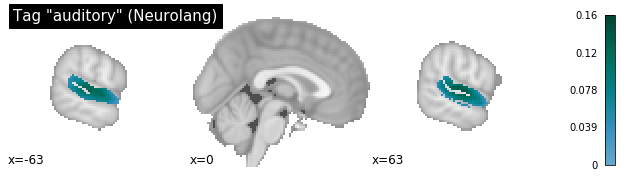

In [29]:
from nilearn import plotting

plotting.plot_stat_map(
    prob_img, title='Tag "auditory" (Neurolang)', 
    cmap='PuBuGn',
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3),
)

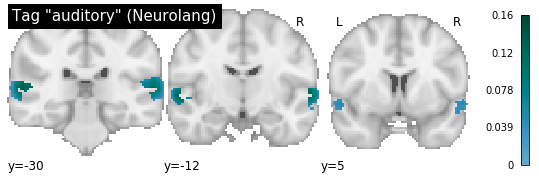

In [30]:
plotting.plot_stat_map(
    prob_img, title='Tag "auditory" (Neurolang)', 
    cmap='PuBuGn',
    display_mode='y',
    cut_coords=np.linspace(-30, 5, 3),
)

In [31]:
prob = prob_img.get_data()
prob_mask = prob > 0
prob_mask_values = prob[prob_mask]

In [32]:
import numpy as np
from scipy import special
from scipy.stats import norm

def p_to_z(p, sign):
    p = p / 2  # convert to two-tailed
    # prevent underflow
    p[p < 1e-240] = 1e-240
    # Convert to z and assign tail
    z = np.abs(norm.ppf(p)) * sign
    # Set very large z's to max precision
    z[np.isinf(z)] = norm.ppf(1e-240) * -1
    return z

def one_way(data, n):
    """ One-way chi-square test of independence.
    Takes a 1D array as input and compares activation at each voxel to
    proportion expected under a uniform distribution throughout the array. Note
    that if you're testing activation with this, make sure that only valid
    voxels (e.g., in-mask gray matter voxels) are included in the array, or
    results won't make any sense!
    """
    term = data.astype('float64')
    no_term = n - term
    t_exp = np.mean(term, 0)
    t_exp = np.array([t_exp, ] * data.shape[0])
    nt_exp = n - t_exp
    t_mss = (term - t_exp) ** 2 / t_exp
    nt_mss = (no_term - nt_exp) ** 2 / nt_exp
    chi2 = t_mss + nt_mss
    return special.chdtrc(1, chi2)

res = one_way(np.round(prob_mask_values * 10000), 10000)

In [33]:
def fdr(p, q=.05):
    """ Determine FDR threshold given a p value array and desired false
    discovery rate q. """
    s = np.sort(p)
    nvox = p.shape[0]
    null = np.array(range(1, nvox + 1), dtype='float') * q / nvox
    below = np.where(s <= null)[0]
    return s[max(below)] if len(below) else -1

p_values_corrected = fdr(res, q=1e-25)

In [34]:
p_value_image = np.zeros_like(prob)
p_value_image[prob_mask] = -np.log10(res)

p_value_image = nib.spatialimages.SpatialImage(p_value_image, affine=prob_img.affine)

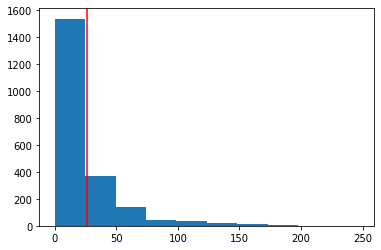

In [36]:
from matplotlib import pyplot as plt
plt.hist(-np.log10(res))
plt.axvline(-np.log10(p_values_corrected), c='r')

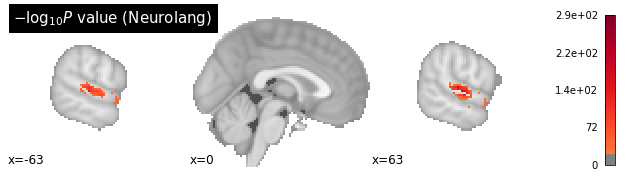

In [37]:
plotting.plot_stat_map(
    p_value_image, title=r'$-\log_{10} P$ value (Neurolang)', 
    threshold=-np.log10(p_values_corrected), 
    cmap='YlOrRd',
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3),
    vmax=2.9e+02
)

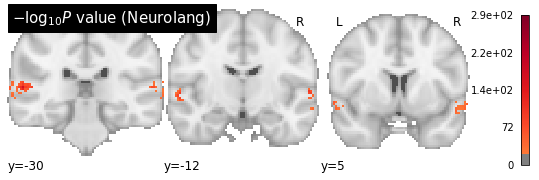

In [38]:
plotting.plot_stat_map(
    p_value_image, title=r'$-\log_{10} P$ value (Neurolang)', 
    threshold=-np.log10(p_values_corrected),
    cmap='YlOrRd',
    display_mode='y',
    cut_coords=np.linspace(-30, 5, 3),
    vmax=2.9e+02
)

## P(term, voxel) / P(voxel)

In [39]:
import numpy as np
prob_img2 = nib.spatialimages.SpatialImage(
    np.zeros(result_data[0][2].image_dim, dtype=float),
    affine=result_data[0][2].affine
)
for p in result_data:
    vox = p[4]
    vox_prob = prob_voxels[prob_voxels.index == vox].prob.values[0]
    prob_img2.dataobj[tuple(p[2].voxels.T)] = p[0]/vox_prob

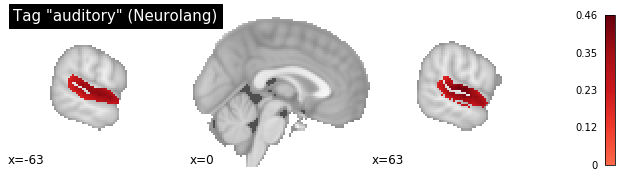

In [40]:
from nilearn import plotting

plotting.plot_stat_map(
    prob_img2, title='Tag "auditory" (Neurolang)', 
    cmap='Reds',
    display_mode='x',
    cut_coords=np.linspace(-63, 63, 3)
)

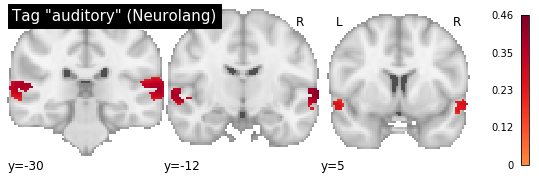

In [41]:
plotting.plot_stat_map(
    prob_img2, title='Tag "auditory" (Neurolang)', 
    cmap='YlOrRd',
    display_mode='y',
    cut_coords=np.linspace(-30, 5, 3)
)